In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

In [438]:
file_name = "orbit.csv"
data = pd.read_csv(file_name)

print("Original Data:")
print(data.head())

Original Data:
   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201


In [439]:
from sklearn.model_selection import train_test_split

time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()

X_train, X_val, y_train, y_val = train_test_split(time_steps, y_positions, test_size=0.2, random_state=42)

# Neural Network Architecture

## Number of layers
The model has 6 layers, 5 hidden layers and 1 output layer.
By adding more layers, the model can have better generalization.

## Dropout and batch normalization
Added dropout to reduce overfitting and improve predections.
Added batch normalization to speed up the training process.

By adding dropout we ensured that the model won't overfit the training data, because we only have 2000 points from -10 to 10.
Therefore, the model needs to be able to generalize to make accurate predictions for all the range from -40 to 40.

Also, by adding batch normalization, we speed up the training process because it normalizes the input layer to make the mean 0 and the standard deviation 1.
Doing that stabilizes the learning process and reduces the number of epochs needed to train the model because we can use a larger learning rate.


In [440]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(256, input_shape=(1, ), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1))

## Learning rate and decay
By adjusting the learning rate and decay, the model's performance can be improved.

Increased the learning rate helps the model to converge faster.
Decay is used to reduce the learning rate over time, which helps the model to converge to a local minimum.

In [441]:
from tensorflow.keras.optimizers.legacy import Adam

optimizer = Adam(learning_rate=0.00125, decay=0.0001)

model.compile(optimizer=optimizer, loss='mse')

## Early stopping and epochs
Increased the number of epochs to 200 and added early stopping to prevent overfitting.

Added early stopping with patience 25 to prevent overfitting and to stop the training process when the loss value stops decreasing.

In [442]:
early_stopping = EarlyStopping(monitor='loss', patience=25, restore_best_weights=True)

model.fit(X_train, y_train, validation_split=0.2, validation_data=(X_val, y_val), epochs=200, callbacks=[early_stopping])

print("Final loss value:", model.evaluate(X_val, y_val))

Epoch 1/200
50/50 [==============================] - 0s 3ms/step - loss: 1627.5231 - val_loss: 1214.3062
Epoch 2/200
50/50 [==============================] - 0s 1ms/step - loss: 1258.3516 - val_loss: 1406.1868
Epoch 3/200
50/50 [==============================] - 0s 1ms/step - loss: 1039.6903 - val_loss: 1772.1067
Epoch 4/200
50/50 [==============================] - 0s 1ms/step - loss: 858.4207 - val_loss: 2132.9722
Epoch 5/200
50/50 [==============================] - 0s 1ms/step - loss: 711.4124 - val_loss: 2082.4573
Epoch 6/200
50/50 [==============================] - 0s 1ms/step - loss: 559.7410 - val_loss: 2052.9448
Epoch 7/200
50/50 [==============================] - 0s 1ms/step - loss: 454.2601 - val_loss: 1548.2097
Epoch 8/200
50/50 [==============================] - 0s 1ms/step - loss: 360.1381 - val_loss: 1189.8772
Epoch 9/200
50/50 [==============================] - 0s 1ms/step - loss: 283.4463 - val_loss: 777.1856
Epoch 10/200
50/50 [==============================] - 0s 1ms/s

In [443]:
def plot_orbit(model_preds, y_axis=550):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim), np.arange(-axeslim, axeslim) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim),model_preds,color="orange")
    plt.axis((-40, 40, -5, y_axis))
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

3/3 [==============================] - 0s 2ms/step


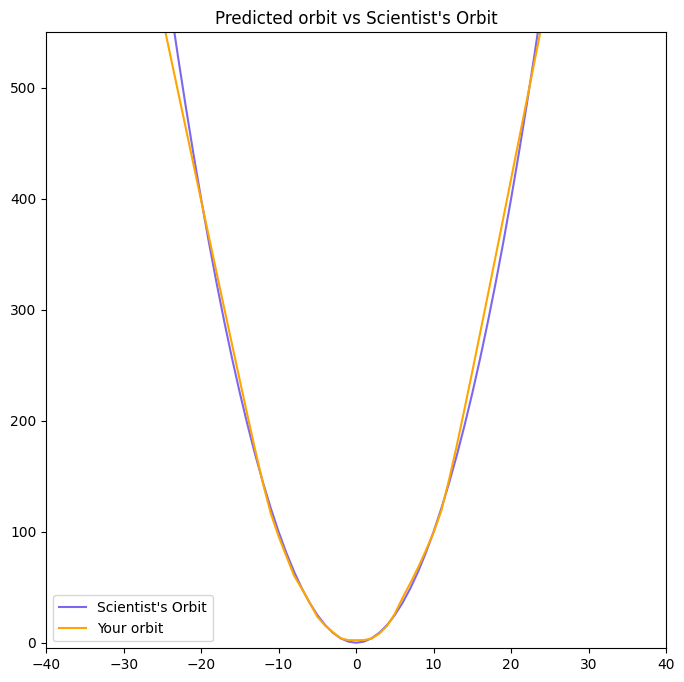

In [450]:
eighty_min_orbit = model.predict(np.arange(-40, 40))

plot_orbit(eighty_min_orbit, 550)

In [445]:
model.save('model.keras')